<a href="https://colab.research.google.com/github/descobar7/DFWorkshop2022/blob/main/Gyroscope_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 00 Set up

In [1]:
%%capture
!pip install kaleido
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

!pip install umap-learn


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import time

import kaleido

import os
import IPython.display as ipd


In [3]:
import os

root = "/content/gyroscope"

if not os.path.exists("gyroscope"):
    os.mkdir("gyroscope")

if not os.path.exists("images"):
    os.mkdir(os.path.join(root,"images"))

if not os.path.exists("data"):
    os.mkdir(os.path.join(root,"data"))


os.mkdir(os.path.join(root,"gyroscope"))


imagespath = os.path.join(root,"images")
datapath = os.path.join(root,"data")
gyroscopepath = os.path.join(root,"gyroscope")
print(imagespath,datapath,gyroscopepath )

/content/gyroscope/images /content/gyroscope/data /content/gyroscope/gyroscope


# 02 Visualizar y exportar

In [4]:
#@markdown #**Subir Gyroscope Data de app ** 🎭

#para subir propio archivo

from google.colab import files
import os
import shutil
from collections import defaultdict,OrderedDict

upload = True #@param {type:"boolean"}


if upload:
 
  from google.colab import files
  import os

  uploaded = files.upload()

  loadedlinks = []

  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    pathloc = os.path.join(gyroscopepath, fn)
    loadedlinks.append(pathloc)
    
    shutil.copy(fn,gyroscopepath)
    os.remove(fn)

df3d = pd.read_csv(pathloc,sep=',')
df3d['timelabel'] = df3d.index.values
#df3d['labels'] = df3d.DeviceOrientation.astype('category').cat.codes  

Saving sensor2.csv to sensor2.csv
User uploaded file "sensor2.csv" with length 613685 bytes


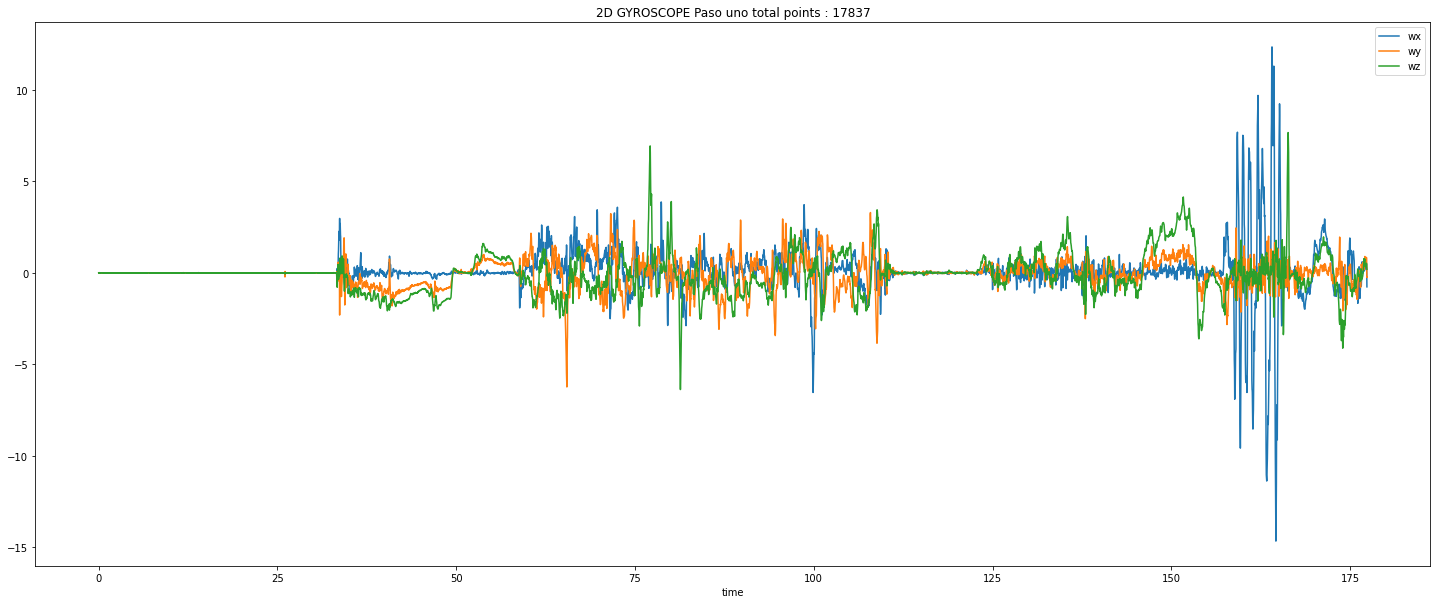

In [5]:
#@markdown #**Gyroscope Data en tiempo** 🎭

guardar_chart = True #@param {type:"boolean"}
nombre = "Paso uno" #@param {type:"string"}

totalpoints = df3d.shape[0]
title = f"2D GYROSCOPE {nombre} total points : {totalpoints}"
plot = df3d.plot(x="time", y=["wx", "wy", "wz"],kind="line", figsize=(25, 10),
        title=title)

fig = plot.get_figure()

plt.show()

if guardar_chart:
  fname = f"2D_gyroscope_{nombre}_{totalpoints}.png"
  chartpath = os.path.join(imagespath,fname)

  fig.savefig(chartpath)


In [6]:
#@markdown #**Gyroscope Data WX en tiempo** 🎭
import numpy as np
x = df3d.time
y1 = df3d.wx
y2 = df3d.wy
y3 = df3d.wz

z = np.zeros(x.shape)

#fig = plt.figure(figsize=(25,7))

from plotly.offline import iplot
import plotly.graph_objs as go


guardar_chart = True #@param {type:"boolean"}


# Create traces

fig = go.Figure(data=go.Scatter3d(
    x=x, y=y1, z=z,
    marker=dict(
        size=2,
        color=df3d['timelabel'],
        colorscale='bluered',
    ),
    line=dict(
        color='black',
        width=1
    )
))


fig.update_layout(
    width=900,
    height=900,
    autosize=False,
    scene=dict(
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1,
                y=-1,
                z=.9,
            )
        ),
        aspectratio = dict( x=1, y=1, z=1 ),
        aspectmode = 'manual'
    ),
)

annotations = []
# Title
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text=f"2D GYROSCOPE WX {nombre} total points : {totalpoints}",
                              font=dict(family='Arial',
                                        size=20,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()
if guardar_chart:
  fname = f"2D_GYROSCOPE_WX_{nombre}_{totalpoints}.png"
  chartpath = os.path.join(imagespath,fname)

  fig.write_image(chartpath,engine="kaleido")


In [7]:
#@markdown #**Gyroscope Data WY en tiempo** 🎭

#fig = plt.figure(figsize=(25,7))

from plotly.offline import iplot
import plotly.graph_objs as go


guardar_chart = True #@param {type:"boolean"}


# Create traces

fig = go.Figure(data=go.Scatter3d(
    x=x, y=y2, z=z,
    marker=dict(
        size=2,
        color=df3d['timelabel'],
        colorscale='bluered',
    ),
    line=dict(
        color='black',
        width=1
    )
))


fig.update_layout(
    width=900,
    height=900,
    autosize=False,
    scene=dict(
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1,
                y=-1,
                z=.9,
            )
        ),
        aspectratio = dict( x=1, y=1, z=1 ),
        aspectmode = 'manual'
    ),
)

annotations = []
# Title
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text=f"2D GYROSCOPE WY {nombre} total points : {totalpoints}",
                              font=dict(family='Arial',
                                        size=20,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

if guardar_chart:
  fname = f"2D_GYROSCOPE_WY_{nombre}_{totalpoints}.png"
  chartpath = os.path.join(imagespath,fname)

  fig.write_image(chartpath,engine="kaleido")


In [8]:
#@markdown #**Gyroscope Data WZ en tiempo** 🎭
#fig = plt.figure(figsize=(25,7))

from plotly.offline import iplot
import plotly.graph_objs as go


guardar_chart = True #@param {type:"boolean"}


# Create traces

fig = go.Figure(data=go.Scatter3d(
    x=x, y=y2, z=z,
    marker=dict(
        size=2,
        color=df3d['timelabel'],
        colorscale='bluered',
    ),
    line=dict(
        color='black',
        width=1
    )
))


fig.update_layout(
    width=900,
    height=900,
    autosize=False,
    scene=dict(
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1,
                y=-1,
                z=.9,
            )
        ),
        aspectratio = dict( x=1, y=1, z=1 ),
        aspectmode = 'manual'
    ),
)

annotations = []
# Title
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text=f"2D GYROSCOPE WZ {nombre} total points : {totalpoints}",
                              font=dict(family='Arial',
                                        size=20,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

if guardar_chart:
  fname = f"2D_GYROSCOPE_WZ_{nombre}_{totalpoints}.png"
  chartpath = os.path.join(imagespath,fname)

  fig.write_image(chartpath,engine="kaleido")


In [9]:
#@markdown #**Interactive Display ** 🎭

#@markdown #**3D gyroscope data** 🎭

width = 900 #@param {type:"integer"}
height = 900 #@param {type:"integer"}
guardar_chart = True #@param {type:"boolean"}
exportar_puntos = True #@param {type:"boolean"}

import plotly.graph_objects as go
import numpy as np

totalpoints = df3d.shape[0]
fig = go.Figure(data=[go.Scatter3d(x=df3d["wx"], y=df3d["wy"], z=df3d["wz"],
                                   mode='markers',
                                   text= df3d['timelabel'],
                                   marker=dict(
                                    size=2,
                                    color=df3d['timelabel'],                # set color to an array/list of desired values
                                    colorscale='bluered',   # choose a colorscale
                                    opacity=0.8, 
                                ))])

title = f"3D mapping of Gyroscope, TOTAL POINTS: {totalpoints}"
# tight layout
"""
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.update_layout(title=title,height=height, width=width)
fig.show()
"""
fig.update_layout(title=title, autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=width, height=height,
                  margin=dict(l=65, r=50, b=65, t=90)
)

fig.show()
if guardar_chart:
  fname = f"3d_gyroscope_{nombre}.png"
  chartpath = os.path.join(imagespath,fname)

  fig.write_image(chartpath,engine="kaleido")

if exportar_puntos:
  fullpath = os.path.join(datapath,f"3d_gyroscope_{nombre}_{totalpoints}.csv")
  df3d.to_csv(fullpath)

# DESCARGAR DATASETS

In [11]:
#@markdown #**Descargar zip files de images y data ** 🎭

import shutil
shutil.make_archive("/content/gyroscope/images", 'zip', 'images')
shutil.make_archive("/content/gyroscope/data", 'zip', 'data')

from google.colab import files
files.download("/content/images.zip")

files.download("/content/data.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>